In [1]:
cd ..

/tempory/NeuralNetworksDIY


In [27]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn import manifold, cluster, metrics
from sklearn.preprocessing import OneHotEncoder


In [3]:
sns.set_theme(style="whitegrid")
sns.color_palette("deep")


def add_2d_scatter(fig, ax, points, point_color, title=None):
    x, y = points.T
    data = pd.DataFrame({"x": x, "y": y, "label": point_color}).sort_values(by="label")
    sns.despine(fig, left=True, bottom=True)
    sns.scatterplot(
        data=data, x="x", y="y", hue="label", linewidth=0, s=10, ax=ax, palette="deep"
    )
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0)
    ax.set_title(title)


In [4]:
def load_data(rootdir, class_list=None, trim: float = 0.5):
    def normalize_batch_image(X):
        mn = np.min(X)
        mx = np.max(X)
        X_norm = (X - mn) * (1.0 / (mx - mn))
        return X_norm

    train = pd.read_csv(os.path.join(rootdir, "fashion-mnist_train.csv"))
    # Filtering requested class
    if class_list:
        train = train[train["label"].isin(class_list)]
    y_train = train["label"].values
    X_train = train.drop(columns="label").values

    test = pd.read_csv(os.path.join(rootdir, "fashion-mnist_test.csv"))
    # Filtering requested class
    if class_list:
        test = test[test["label"].isin(class_list)]
    y_test = test["label"].values
    X_test = test.drop(columns="label").values

    trim_train = int(len(X_train) * trim)
    # trim_test = int(len(X_test) * trim)
    trim_test = int(len(X_test))

    # Normalization + trimming
    X_train = normalize_batch_image(X_train[:trim_train, :])
    X_test = normalize_batch_image(X_test[:trim_test, :])
    y_train = y_train[:trim_train]
    y_test = y_test[:trim_test]

    return (X_train, X_test, y_train, y_test)


rootdir = "./data/fashion-mnist/"
X_train, X_test, y_train, y_test = load_data(rootdir, trim=0.5)

y_train_oh = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_oh = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()
nb_class = y_train_oh.shape[1]
batch_size = 64


# Encoder decoder simple
Espace lattent de 64
```py
encoder = [
    Linear(784, 64, init_type="xavier_uniform"),
    TanH(),
]
decoder = [
    Linear(64, 784, init_type="xavier_uniform"), 
    Sigmoid()]
```

In [29]:
with open("./notebooks/fashion-mnist_1000_epoch.pkl", "rb") as f:
    model = pickle.load(f)
X_decoded = model.forward(X_test)


## T-SNE

In [6]:
X_test.shape


(10000, 784)

In [7]:
tsne = manifold.TSNE(n_jobs=-1, perplexity=100)
x_reduced = tsne.fit_transform(X_decoded)


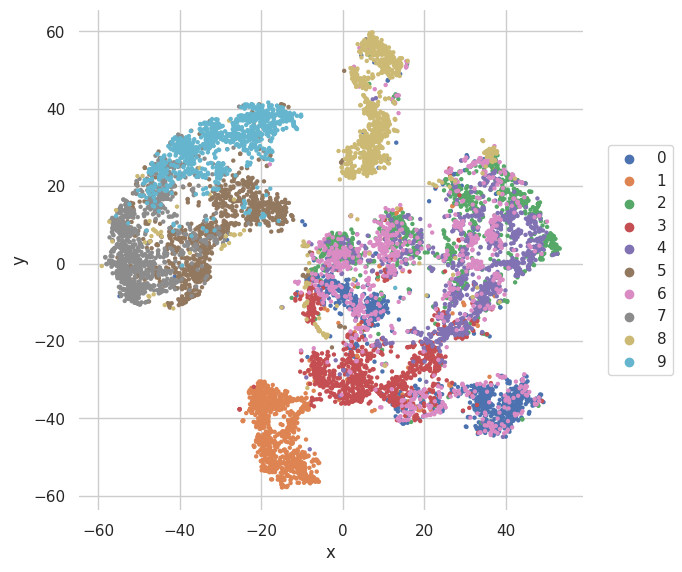

In [8]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
add_2d_scatter(fig, ax, x_reduced, y_test, "")


On voit que certaine class doivent être mal reconstitué, voyons voir

In [12]:
X_test.shape


(10000, 784)

In [16]:
y_test[:10]


array([0, 1, 2, 2, 3, 2, 8, 6, 5, 0])

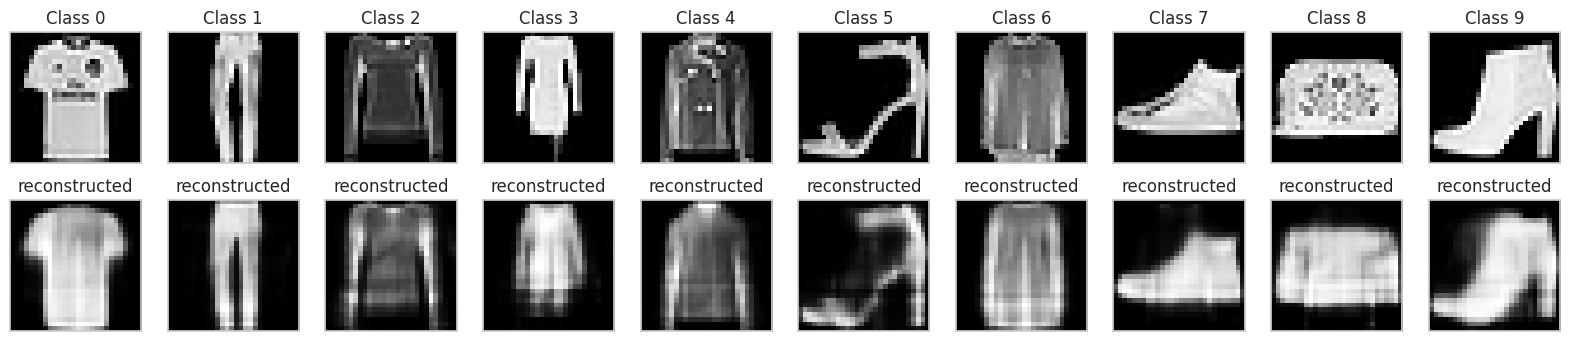

In [24]:
plt.figure(figsize=(20, 4))
for i in range(nb_class):
    first_class_img = X_test[np.nonzero(y_test == i)[0][0]].reshape(1, -1)

    # display original
    ax = plt.subplot(2, nb_class, i + 1)
    plt.imshow(first_class_img.reshape(28, 28))
    plt.title(f"Class {i}")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, nb_class, i + 1 + nb_class)
    plt.imshow(model(first_class_img).reshape(28, 28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


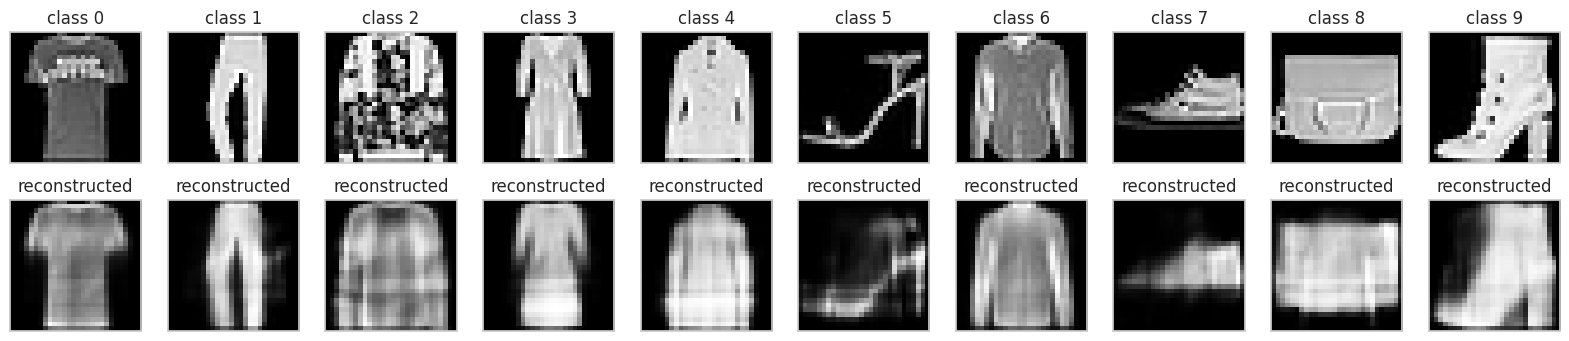

In [25]:
plt.figure(figsize=(20, 4))
for i in range(nb_class):
    first_class_img = X_test[np.nonzero(y_test == i)[0][1]].reshape(1, -1)

    # display original
    ax = plt.subplot(2, nb_class, i + 1)
    plt.imshow(first_class_img.reshape(28, 28))
    plt.title(f"class {i}")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, nb_class, i + 1 + nb_class)
    plt.imshow(model(first_class_img).reshape(28, 28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Ca a l'air d'aller en vrais

## Clustering

In [30]:
for estimator in [cluster.k_means(n_clusters=nb_class), cluster.ward_tree(), clust cluster.AgglomerativeClustering, cluster.DBSCAN, cluster.OPTICS, cluster.Birch]

KeyboardInterrupt: 